In [213]:
import pandas as pd
import geopandas as gpd
import pydeck as pdk
import shapely
import numpy as np
import folium

In [2]:
TripChain = pd.read_csv('PJT001_TripChain.csv')

In [3]:
TripChain.columns

Index(['암호화카드번호||'', ''||트랜잭션ID||'', ''||환승횟수||'', ''||교통카드발행사ID||'',
       ''||총이용객수||'', ''||사용자구분||'', ''||교통수단CD1||'', ''||교통수단CD2||'',
       ''||교통수단CD3||'', ''||교통수단CD4||'', ''||교통수단CD5||'', ''||버스노선ID1||'',
       ''||버스노선ID2||'', ''||버스노선ID3||'', ''||버스노선ID4||'', ''||버스노선ID5||'',
       ''||차량ID1||'', ''||차량ID2||'', ''||차량ID3||'', ''||차량ID4||'',
       ''||차량ID5||'', ''||총통행거리||'', ''||총탑승시간||'', ''||총소요시간||'',
       ''||승차일시1||'', ''||승차일시2||'', ''||승차일시3||'', ''||승차일시4||'',
       ''||승차일시5||'', ''||하차일시1||'', ''||하차일시2||'', ''||하차일시3||'',
       ''||하차일시4||'', ''||하차일시5||'', ''||최초승차일시||'', ''||최종하차일시||'',
       ''||승차역ID1||'', ''||승차역ID2||'', ''||승차역ID3||'', ''||승차역ID4||'',
       ''||승차역ID5||'', ''||하차역ID1||'', ''||하차역ID2||'', ''||하차역ID3||'',
       ''||하차역ID4||'', ''||하차역ID5||'', ''||최초승차역ID||'', ''||최종하차역ID||'',
       ''||총이용금액||'', ''||수집건수||'', ''||트립체인완료코드'],
      dtype='object')

In [4]:
network = gpd.read_file('PJT001_moc_link_2018.geojson')

In [5]:
network.columns

Index(['id', 'link_id', 'f_node', 't_node', 'road_use', 'lanes', 'road_rank',
       'road_name', 'multi_link', 'connect', 'max_spd', 'rest_veh', 'rest_w',
       'rest_h', 'remark', 'user_id', 'workstate', 'dept_code', 'stnl_reg',
       'road_type', 'road_no', 'tmpid', 'upload_id', 'sosfnodeid',
       'sostnodeid', 'shape_stle', 'geometry'],
      dtype='object')

In [6]:
def line_string_to_coordinates(line_string):
    if isinstance(line_string, shapely.geometry.linestring.LineString):
        lon, lat = line_string.xy
        return [[x,y] for x, y in zip(lon, lat)]
    elif isinstance(line_string, shapely.geometry.multilinestring.MultiLineString):
        ret = []
        for i in range(len(line_string)):
            lon, lat = line_string[i].xy
            for x, y in zip(lon, lat):
                ret.append([x, y])
            return ret

In [7]:
network['geometry'] = network['geometry'].apply(line_string_to_coordinates)
network = pd.DataFrame(network)
network.head

<bound method NDFrame.head of            id     link_id      f_node      t_node road_use  lanes road_rank  \
0       63255  2333070000  2330045500  2330045200        0    1.0       107   
1       63119  2330018207  2330007302  2330007304        0    2.0       103   
2       63120  2330018108  2330007305  2330007304        0    2.0       103   
3       63150  2333144900  2330079100  2330076000        0    2.0       107   
4       63176  2230004902  2330009100  2330009101        0    1.0       106   
...       ...         ...         ...         ...      ...    ...       ...   
10558  298721  2280726100  2280260400  2280260100        0    1.0       107   
10559  298722  2280726200  2280260400  2280260300        0    1.0       107   
10560  298723  2280726300  2280260300  2280260400        0    1.0       107   
10561  298724  2280726400  2280260600  2280260500        0    2.0       107   
10562  298725  2280726500  2280260500  2280260600        0    2.0       107   

      road_name multi

In [8]:
layer = pdk.Layer(
        'PathLayer', 
        network, 
        get_path='geometry', 
        width_min_pixels=5,
        get_color = '[255, 147, 0, 150]')

center = [126.8312, 37.1995]
view_state = pdk.ViewState(
            longitude = center[0], 
            latitude = center[1], 
            zoom = 9)

r= pdk.Deck(layers=[layer], initial_view_state = view_state)

r.show()

DeckGLWidget(json_input='{"initialViewState": {"bearing": 0, "latitude": 37.1995, "longitude": 126.8312, "maxZ…

In [9]:
route = gpd.read_file('PJT001_routestationinfo.csv')

'seq ' : 순번

'pr_station_id' : 노선 ID

'bus_line_no' : 버스 노선 번호

'bus_line_no_seq' : 버스 라인 정류장 순서.

'station_nm ' : 정류장 명칭.

'station_id ' : 표준정류장ID.

'mobile_no' : 모바일정류장ID.

In [13]:
route.head()

,seq,pr_station_id,bus_line_no,bus_line_no_seq,station_nm,station_id,mobile_no,geometry
0,65286,228000018,10-4,1,b'\xec\x9a\xa9\xec\x9d\xb8\xed\x84\xb0\xeb\xaf...,228001552,47634,None
1,65287,228000018,10-4,2,b'\xec\x9a\xa9\xec\x9d\xb8\xed\x84\xb0\xeb\xaf...,277102443,,None
2,65288,228000018,10-4,3,b'\xed\x8f\xac\xeb\xb8\x8c\xec\x8a\xa4\xeb\xb3...,228000443,29439,None
3,65289,228000018,10-4,4,b'\xec\xa0\x9c\xec\x9d\xbc\xea\xb5\x90\xed\x9a...,228000665,29881,None
4,65290,228000018,10-4,5,b'\xeb\x9d\xbc\xec\x9d\xb4\xed\x94\x84\xec\x95...,228000664,29457,None


In [50]:
route.shape

(37831, 8)

In [19]:
pd.DataFrame(route.isnull().sum())  
# route.loc[1, 'mobile_no']은 null인데 왜 null이 없다고 나오지?????????????????????????????????????

,0
seq,0
pr_station_id,0
bus_line_no,0
bus_line_no_seq,0
station_nm,0
station_id,0
mobile_no,0
geometry,37831


In [35]:
route.loc[route['mobile_no']=='', 'mobile_no'] = np.nan

In [36]:
route.head()

,seq,pr_station_id,bus_line_no,bus_line_no_seq,station_nm,station_id,mobile_no,geometry
0,65286,228000018,10-4,1,b'\xec\x9a\xa9\xec\x9d\xb8\xed\x84\xb0\xeb\xaf...,228001552,47634,None
1,65287,228000018,10-4,2,b'\xec\x9a\xa9\xec\x9d\xb8\xed\x84\xb0\xeb\xaf...,277102443,NaN,None
2,65288,228000018,10-4,3,b'\xed\x8f\xac\xeb\xb8\x8c\xec\x8a\xa4\xeb\xb3...,228000443,29439,None
3,65289,228000018,10-4,4,b'\xec\xa0\x9c\xec\x9d\xbc\xea\xb5\x90\xed\x9a...,228000665,29881,None
4,65290,228000018,10-4,5,b'\xeb\x9d\xbc\xec\x9d\xb4\xed\x94\x84\xec\x95...,228000664,29457,None


In [39]:
route[route['station_id'] ==''] 
# station_id에는 진짜 null값없음

,seq,pr_station_id,bus_line_no,bus_line_no_seq,station_nm,station_id,mobile_no,geometry


In [15]:
station = pd.read_csv('PJT001_stations_table.csv')

In [17]:
station.head()

,표준정류장ID,시군명,정류소명,정류소영문명,정류소번호,중앙차로여부,관할관청,위치,WGS84위도,WGS84경도,모바일정류장ID,이비카드정류장ID
0,228003422,용인시,손골마을회관.국제학교,"Songol Community Center,",56443.0,노변정류장,경기도 용인시,NaN,37.342517,127.066817,56443.0,NaN
1,228003423,용인시,풀잎사랑,Pulipsarang,56444.0,노변정류장,경기도 용인시,NaN,37.341800,127.068983,56444.0,NaN
2,228003424,용인시,풀잎사랑,Pulipsarang,56445.0,노변정류장,경기도 용인시,NaN,37.341817,127.069083,56445.0,NaN
3,228003425,용인시,대성공정,Daesung Process,56446.0,노변정류장,경기도 용인시,NaN,37.339350,127.073067,56446.0,NaN
4,228003426,용인시,대성공정,Daesung Process,56447.0,노변정류장,경기도 용인시,NaN,37.339183,127.073400,56447.0,NaN


In [40]:
station_for_merge = station[['표준정류장ID', '정류소명', 'WGS84위도', 'WGS84경도']]

In [41]:
station_for_merge.columns = ['station_id', '정류소명', 'lat', 'lon']

In [47]:
station_for_merge['station_id']= station_for_merge['station_id'].astype(int)
route['station_id'] = route['station_id'].astype(int)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
route_merged = pd.merge(route, station_for_merge, on='station_id', how = 'left')

In [64]:
route_merged.head() 
# 왜 duplicates가 생기지?????????????????

,seq,pr_station_id,bus_line_no,bus_line_no_seq,station_nm,station_id,mobile_no,geometry,정류소명,lat,lon
0,65286,228000018,10-4,1,b'\xec\x9a\xa9\xec\x9d\xb8\xed\x84\xb0\xeb\xaf...,228001552,47634,None,용인터미널,37.232783,127.210100
1,65286,228000018,10-4,1,b'\xec\x9a\xa9\xec\x9d\xb8\xed\x84\xb0\xeb\xaf...,228001552,47634,None,용인터미널,37.232783,127.210100
2,65287,228000018,10-4,2,b'\xec\x9a\xa9\xec\x9d\xb8\xed\x84\xb0\xeb\xaf...,277102443,NaN,None,용인터미널(경유),37.235350,127.209033
3,65288,228000018,10-4,3,b'\xed\x8f\xac\xeb\xb8\x8c\xec\x8a\xa4\xeb\xb3...,228000443,29439,None,포브스병원,37.235267,127.210617
4,65289,228000018,10-4,4,b'\xec\xa0\x9c\xec\x9d\xbc\xea\xb5\x90\xed\x9a...,228000665,29881,None,제일교회,37.234300,127.213333


In [156]:
route_merged = route_merged.drop_duplicates()
#일단 duplicates다 버리고 분석 시작
route_merged= route_merged.reset_index(drop=True)

In [157]:
route_merged.shape 
# 기존 route 테이블과 rows 수 일치 확인

(37831, 11)

#### 일단 버스 10-4번 지도 찍어보기 

In [228]:
bus10_4 = route_merged[route_merged['bus_line_no'] == '10-4']

In [229]:
bus10_4['bus_line_no_seq'] = bus10_4['bus_line_no_seq'].astype(int)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [230]:
bus10_4 = bus10_4.reset_index(drop=True)

In [231]:
bus10_4

,seq,pr_station_id,bus_line_no,bus_line_no_seq,station_nm,station_id,mobile_no,geometry,정류소명,lat,lon
0,65286,228000018,10-4,1,b'\xec\x9a\xa9\xec\x9d\xb8\xed\x84\xb0\xeb\xaf...,228001552,47634,None,용인터미널,37.232783,127.210100
1,65287,228000018,10-4,2,b'\xec\x9a\xa9\xec\x9d\xb8\xed\x84\xb0\xeb\xaf...,277102443,NaN,None,용인터미널(경유),37.235350,127.209033
2,65288,228000018,10-4,3,b'\xed\x8f\xac\xeb\xb8\x8c\xec\x8a\xa4\xeb\xb3...,228000443,29439,None,포브스병원,37.235267,127.210617
3,65289,228000018,10-4,4,b'\xec\xa0\x9c\xec\x9d\xbc\xea\xb5\x90\xed\x9a...,228000665,29881,None,제일교회,37.234300,127.213333
4,65290,228000018,10-4,5,b'\xeb\x9d\xbc\xec\x9d\xb4\xed\x94\x84\xec\x95...,228000664,29457,None,라이프아파트,37.231483,127.213767
...,...,...,...,...,...,...,...,...,...,...,...
168,189691,241485021,10-4,49,b'\xec\x9e\xa5\xec\xa7\x90\xec\x82\xbc\xea\xb1...,233002357,55239,None,장짐삼거리,37.139500,126.901083
169,189692,241485021,10-4,50,b'\xed\x99\x94\xec\x84\xb1\xec\xa4\x91\xea\xb3...,233000526,37255,None,화성중고등학교,37.138033,126.905483
170,189693,241485021,10-4,51,諛붾떎留덊듃,233001769,37809,None,바다마트,37.135583,126.910900
171,189694,241485021,10-4,52,b'\xeb\xb0\x9c\xec\x95\x88\xeb\xa7\x8c\xec\x84...,233001394,36925,None,발안만세시장,37.132717,126.908600


In [232]:
inde = 3
bus10_4.loc[inde+1]['lat']

37.2314833

In [233]:
lat_end = []
lon_end = []
for i in bus10_4.index:
    if i != 172:
        lat_end.append(bus10_4.loc[i+1]['lat'])
        lon_end.append(bus10_4.loc[i+1]['lon'])
    if i == 172: 
        lat_end.append(bus10_4.loc[i]['lat'])
        lon_end.append(bus10_4.loc[i]['lon'])
bus10_4['lat_end'] = lat_end
bus10_4['lon_end'] = lon_end

In [234]:
len(lat_end)

173

In [235]:
bus10_4.tail()

,seq,pr_station_id,bus_line_no,bus_line_no_seq,station_nm,station_id,mobile_no,geometry,정류소명,lat,lon,lat_end,lon_end
168,189691,241485021,10-4,49,b'\xec\x9e\xa5\xec\xa7\x90\xec\x82\xbc\xea\xb1...,233002357,55239,None,장짐삼거리,37.139500,126.901083,37.138033,126.905483
169,189692,241485021,10-4,50,b'\xed\x99\x94\xec\x84\xb1\xec\xa4\x91\xea\xb3...,233000526,37255,None,화성중고등학교,37.138033,126.905483,37.135583,126.910900
170,189693,241485021,10-4,51,諛붾떎留덊듃,233001769,37809,None,바다마트,37.135583,126.910900,37.132717,126.908600
171,189694,241485021,10-4,52,b'\xeb\xb0\x9c\xec\x95\x88\xeb\xa7\x8c\xec\x84...,233001394,36925,None,발안만세시장,37.132717,126.908600,37.129767,126.905017
172,189695,241485021,10-4,53,b'\xed\x99\x94\xec\x84\xb1\xec\x8b\x9c\xeb\xb3...,233002971,NaN,None,화성시보건소앞,37.129767,126.905017,37.129767,126.905017


In [236]:
# layer = pdk.Layer( 'ArcLayer', 
#                   bus10_4, 
#                   get_source_position='[lon, lat]', 
#                   get_target_position='[lon_end, lat_end]', 
#                   get_width = '50',
#                   get_source_color = '[255, 225, 150]' ,
#                   get_target_color = '[255, 0, 0]',
#                   pickable=True, 
#                   auto_highlight=True, 
#                  ) 

                  
# center = [126.8312, 37.1995]
# view_state = pdk.ViewState(
#             longitude = center[0], 
#             latitude = center[1], 
#             zoom = 9)


# view_state.zoom = 13 

# r = pdk.Deck(layers=[layer], initial_view_state=view_state) 

# r.show()


In [240]:
lines = bus10_4[['lat', 'lon']].values.tolist()

In [241]:
lines

[[37.2327833, 127.2101],
 [37.23535, 127.2090333],
 [37.2352667, 127.21061670000002],
 [37.2343, 127.2133333],
 [37.2314833, 127.2137667],
 [37.2281333, 127.21526670000002],
 [37.2231667, 127.2240667],
 [37.2211333, 127.2261667],
 [37.21816670000001, 127.2297167],
 [37.2161167, 127.2305167],
 [37.2093667, 127.2340333],
 [37.2068833, 127.2371],
 [37.20495, 127.2402667],
 [37.2023833, 127.24483329999998],
 [37.2000667, 127.24915],
 [37.1919, 127.25745],
 [37.1885333, 127.2678667],
 [37.1874833, 127.27055],
 [37.1887, 127.2767167],
 [37.1818667, 127.2831],
 [37.17755, 127.2950833],
 [37.1791667, 127.3003667],
 [37.1807333, 127.30525],
 [37.176, 127.30835],
 [37.1647333, 127.3109167],
 [37.1625833, 127.3157],
 [37.15975, 127.32165],
 [37.1554833, 127.33775],
 [37.15566670000001, 127.34116670000002],
 [37.1548, 127.3449],
 [37.1567, 127.3495167],
 [37.1585833, 127.3521],
 [37.1602, 127.3554833],
 [37.1603667, 127.3618833],
 [37.16315, 127.36813329999998],
 [37.1656167, 127.37376670000002],


In [246]:
center = [37.1995, 126.8312]
m =folium.Map(location = center, zoom_start = 10)
for each in lines:
    folium.Marker(each).add_to(m)
    
folium.PolyLine(lines
               , color = 'red'
               , weight = 2.5
               , opacity = 1).add_to(m)

m


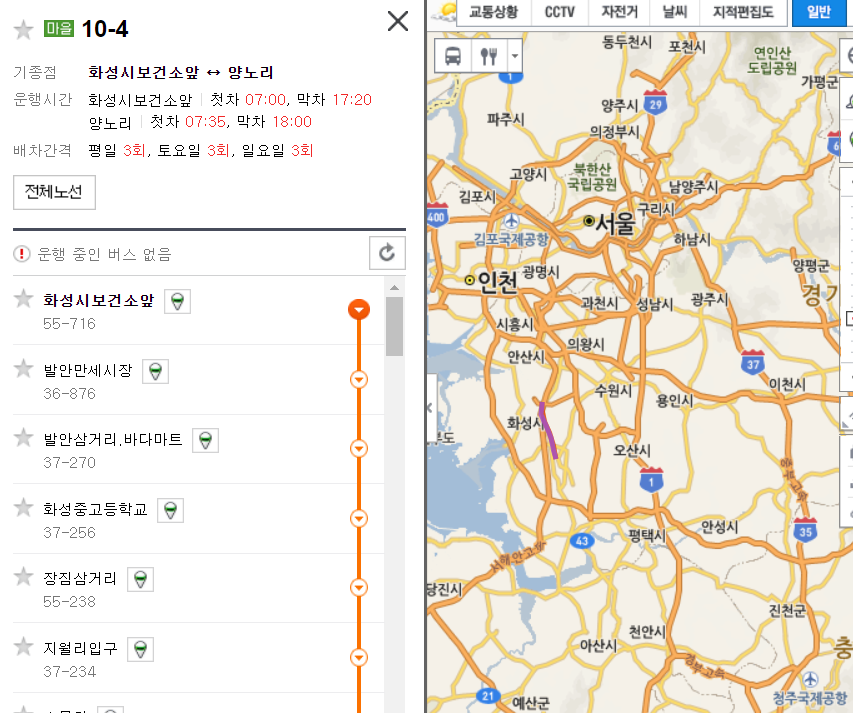

설마.....화성시 버스만 있는게 아니라 용인, 안성 버스까지 섞여있는건가....
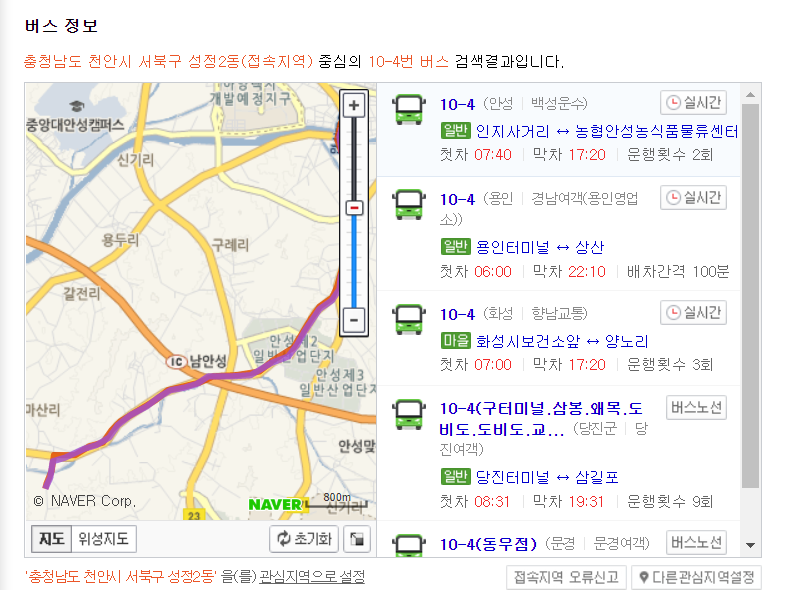